In [60]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import scikit_posthocs as sp


import matplotlib.pyplot as plt
import seaborn as sns



In [316]:
df.to_csv('./a_all.csv')

# Load

In [61]:
# l_df=pd.read_csv("./csv2/l_all.csv")
# m_df=pd.read_csv("./csv2/m_all.csv")
# s_df=pd.read_csv("./csv2/s_all.csv")
# t_df=pd.read_csv("./csv2/t_all.csv")
l_df=pd.read_csv("./all_a_l.csv")
m_df=pd.read_csv("./all_a_m.csv")
s_df=pd.read_csv("./all_a_s.csv")
t_df=pd.read_csv("./all_a_t.csv")

# Clean

In [62]:
#user_time 
l_df.user_time=pd.to_numeric(l_df.user_time.str.replace('"',''))*1e+9
m_df.user_time=pd.to_numeric(m_df.user_time.str.replace('"',''))*1e+9
s_df.user_time=pd.to_numeric(s_df.user_time.str.replace('"',''))*1e+9
t_df.user_time=pd.to_numeric(t_df.user_time.str.replace('"',''))*1e+9
#system_time
l_df.system_time=pd.to_numeric(l_df.system_time.str.replace('"',''))*1e+9
m_df.system_time=pd.to_numeric(m_df.system_time.str.replace('"',''))*1e+9
s_df.system_time=pd.to_numeric(s_df.system_time.str.replace('"',''))*1e+9
t_df.system_time=pd.to_numeric(t_df.system_time.str.replace('"',''))*1e+9

In [63]:
# l_df['cpu_core']=1
# m_df['cpu_core']=0.5
# s_df['cpu_core']=.25
# t_df['cpu_core']=.125
# l_df['ram']=512
# m_df['ram']=256
# s_df['ram']=128
# t_df['ram']=64
l_df['comp_size']='l'
m_df['comp_size']='m'
s_df['comp_size']='s'
t_df['comp_size']='t'
l_df['cpu_core']=.5
m_df['cpu_core']=0.25
s_df['cpu_core']=.125
t_df['cpu_core']=.0625
l_df['ram']=256
m_df['ram']=128
s_df['ram']=64
t_df['ram']=32
df=pd.concat([l_df,m_df], ignore_index=True)
df=pd.concat([df,s_df], ignore_index=True)
df=pd.concat([df,t_df], ignore_index=True)

In [64]:
df.dropna().info()
df=df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648000 entries, 0 to 647999
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   cl_sig           648000 non-null  object 
 1   pq_sig           648000 non-null  object 
 2   cl               648000 non-null  object 
 3   pq               648000 non-null  object 
 4   delay            648000 non-null  int64  
 5   loss             648000 non-null  int64  
 6   mtu              648000 non-null  int64  
 7   idx              648000 non-null  int64  
 8   decap_cl         648000 non-null  int64  
 9   decap_pq         648000 non-null  int64  
 10  decap_hybrid     648000 non-null  int64  
 11  sig_verify       648000 non-null  int64  
 12  user_time        648000 non-null  float64
 13  system_time      648000 non-null  float64
 14  cpu              648000 non-null  int64  
 15  wall_clock_time  648000 non-null  object 
 16  memory           648000 non-null  int6

# Distribution

## Histogram

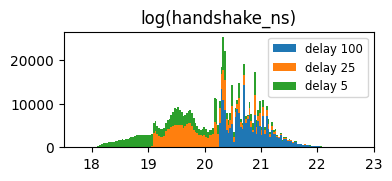

In [309]:
all_data=[]
for i in df.delay.unique():
    tmp=df[df.delay==i]
    data=np.log(tmp.handshake_ns)
    all_data.append(data)
plt.figure(figsize=(4,1.5))
plt.hist(all_data, bins=200, stacked=True, histtype='barstacked', label=["delay "+str(i) for i in df.delay.unique()])
plt.xlim([17.5,23])
plt.legend(fontsize='small')
plt.title('log(handshake_ns)')
plt.show()

clear groupings from delay, overlap in 5-25

In [66]:
df['log_hs']=np.log(df.handshake_ns)

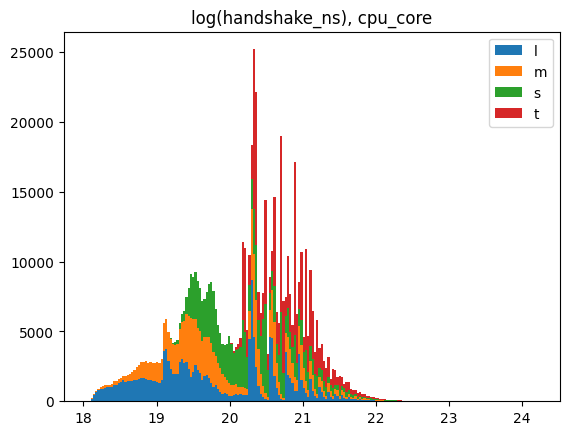

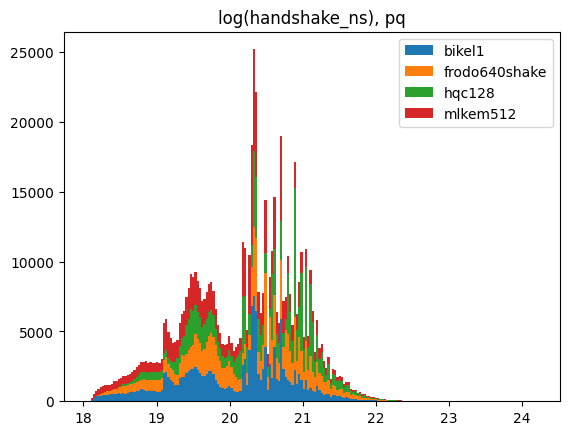

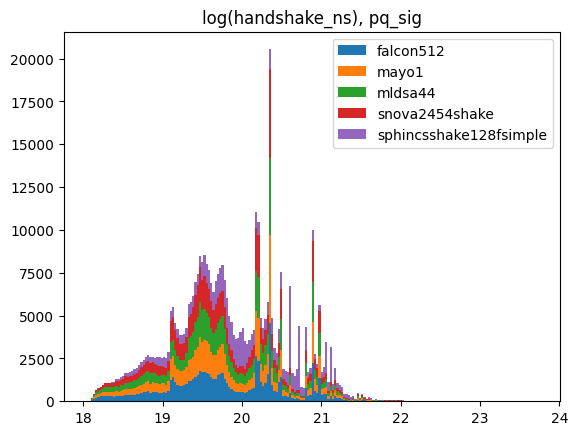

In [91]:
all_data=[]
for i in df.comp_size.unique():
    tmp=df[(df.comp_size==i)]
    data=np.log(tmp.handshake_ns)
    all_data.append(data)
plt.hist(all_data, bins=200, stacked=True, histtype='barstacked', label=df.comp_size.unique())
# plt.xlim([-0.1,.5])
plt.title('log(handshake_ns), cpu_core')
plt.legend()
plt.show()

all_data=[]
for i in df.pq.unique():
    tmp=df[(df.pq==i)]
    data=np.log(tmp.handshake_ns)
    all_data.append(data)
plt.hist(all_data, bins=200, stacked=True, histtype='barstacked', label=df.pq.unique())
# plt.xlim([-0.1,.5])
plt.title('log(handshake_ns), pq')
plt.legend()
plt.show()

all_data=[]
for i in df.pq_sig.unique():
    tmp=df[(df.pq_sig==i) & (df.delay<100)]
    data=np.log(tmp.handshake_ns)
    all_data.append(data)
plt.hist(all_data, bins=200, stacked=True, histtype='barstacked', label=df.pq_sig.unique())
# plt.xlim([-0.1,.5])
plt.title('log(handshake_ns), pq_sig')
plt.legend()
plt.show()

only different compute sizes matter. (cpu_core, ram are not combinations but the same)

differing computes were not sufficiently different.

count    648000.000000
mean          0.384204
std           0.344427
min           0.000143
25%           0.050802
50%           0.330587
75%           0.713915
max           0.999841
dtype: float64


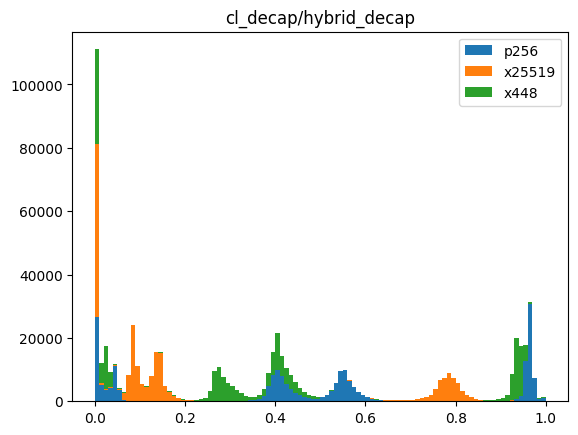

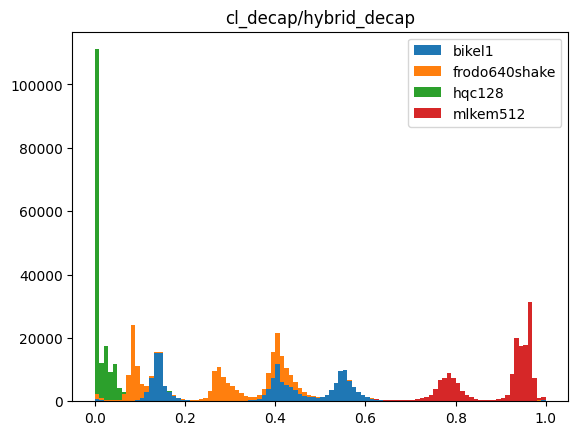

In [68]:
desc=(df.decap_cl/df.decap_hybrid).describe()
print(desc)
all_data=[]
for i in df.cl.unique():
    tmp=df[df.cl==i]
    data=(tmp.decap_cl)/tmp.decap_hybrid
    all_data.append(data)
plt.hist(all_data, bins=100, stacked=True, histtype='barstacked', label=df.cl.unique())
plt.title('cl_decap/hybrid_decap')
plt.legend()
plt.show()

all_data=[]
for i in df.pq.unique():
    tmp=df[df.pq==i]
    data=(tmp.decap_cl)/tmp.decap_hybrid
    all_data.append(data)
plt.hist(all_data, bins=100, stacked=True, histtype='barstacked', label=df.pq.unique())
plt.title('cl_decap/hybrid_decap')
plt.legend()
plt.show()

clearly shows some differences in distributions between the combinations. with mlkem being the clearest

In [237]:
df.memory.describe()

count    648000.000000
mean      11232.576198
std         240.126539
min       10368.000000
25%       11008.000000
50%       11264.000000
75%       11392.000000
max       12032.000000
Name: memory, dtype: float64

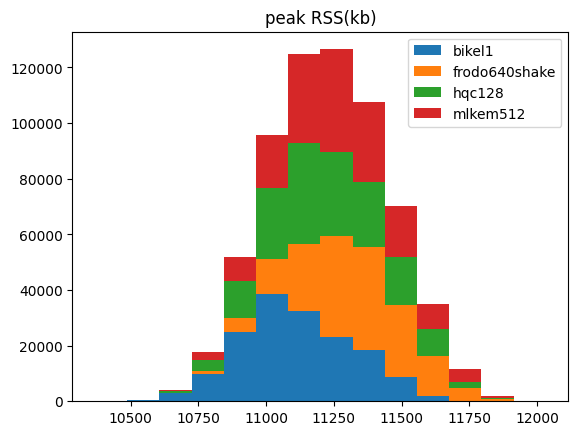

In [96]:
all_data=[]
for i in df.pq.unique():
    tmp=df[df.pq==i]
    data=tmp.memory
    all_data.append(data)
plt.hist(all_data, bins=14, stacked=True, histtype='barstacked', label=df.pq.unique())
# plt.xlim([15,25])
plt.title('peak RSS(kb)')
plt.legend()
plt.show()

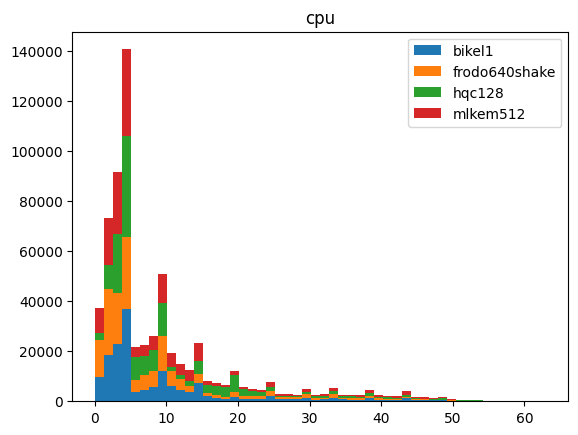

In [70]:
all_data=[]
for i in df.pq.unique():
    tmp=df[df.pq==i]
    data=tmp.cpu
    data=(tmp.cpu)
    all_data.append(data)
plt.hist(all_data, bins=50, stacked=True, histtype='barstacked', label=df.pq.unique())
# plt.xlim([15,25])
plt.title('cpu')
plt.legend()
plt.show()

## Boxplot

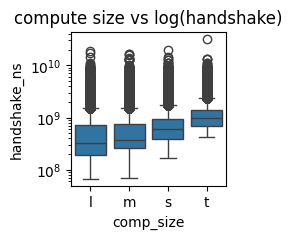

In [306]:
# log scale, write that not log(xx)

# KEM
summary = df.groupby(['comp_size']).agg(
    n=('handshake_ns','count'),
    median=('handshake_ns','median'),
    mean=('handshake_ns','mean'),
    std=('handshake_ns','std'),
    cv=('handshake_ns', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(2,2))
sns.boxplot(data=df, x='comp_size', y='handshake_ns')
plt.yscale('log')  # if skewed
plt.title("compute size vs log(handshake)")
plt.show()

In [260]:
# plt.hist(((df.decap_hybrid+df.sig_verify)/df.handshake_ns).describe(),bins=100)
# plt.show()
(((df.decap_hybrid+df.sig_verify)/df.handshake_ns)*100).describe()

count    648000.000000
mean          3.363841
std           6.518724
min           0.004345
25%           0.192478
50%           0.462314
75%           1.853386
max          52.521069
dtype: float64

In [252]:
df['%_crypto']=((df.decap_hybrid+df.sig_verify)/df.handshake_ns)*100

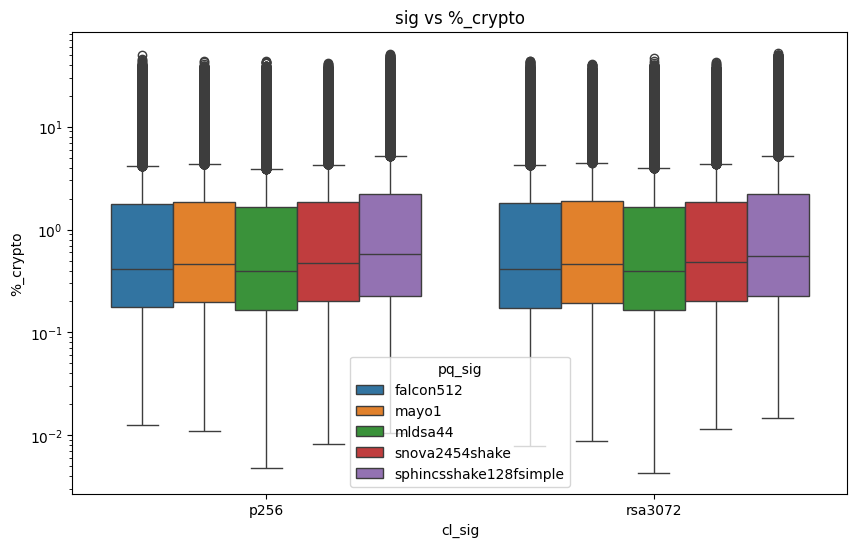

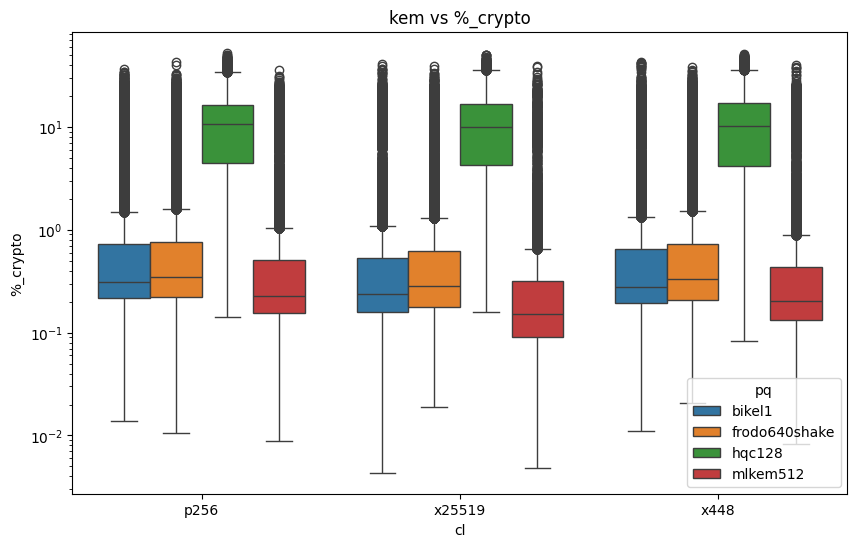

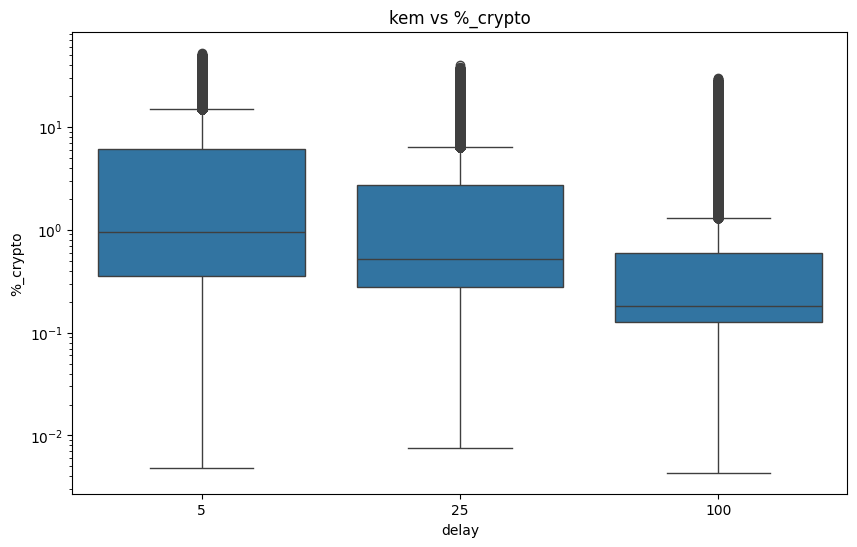

In [258]:
summary = df.groupby(['cl_sig','pq_sig']).agg(
    n=('%_crypto','count'),
    median=('%_crypto','median'),
    mean=('%_crypto','mean'),
    std=('%_crypto','std'),
    cv=('%_crypto', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cl_sig', y='%_crypto', hue='pq_sig')
plt.yscale('log')  # if skewed
plt.title("sig vs %_crypto")
plt.show()
#########################################

summary = df.groupby(['cl','pq']).agg(
    n=('%_crypto','count'),
    median=('%_crypto','median'),
    mean=('%_crypto','mean'),
    std=('%_crypto','std'),
    cv=('%_crypto', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cl', y='%_crypto', hue='pq')
plt.yscale('log')  # if skewed
plt.title("kem vs %_crypto")
plt.show()
#########################################
summary = df.groupby(['delay']).agg(
    n=('%_crypto','count'),
    median=('%_crypto','median'),
    mean=('%_crypto','mean'),
    std=('%_crypto','std'),
    cv=('%_crypto', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='delay', y='%_crypto')
plt.yscale('log')  # if skewed
plt.title("delay vs %_crypto")
plt.show()

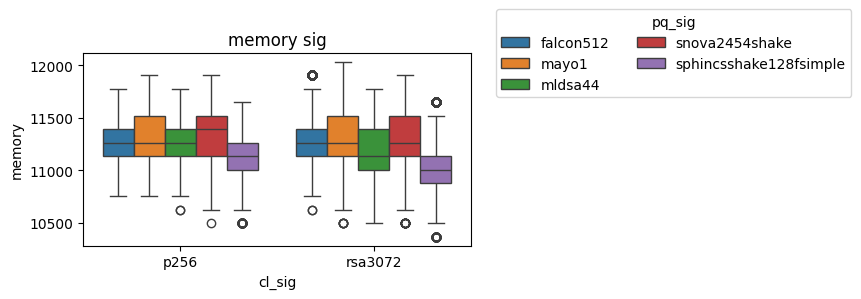

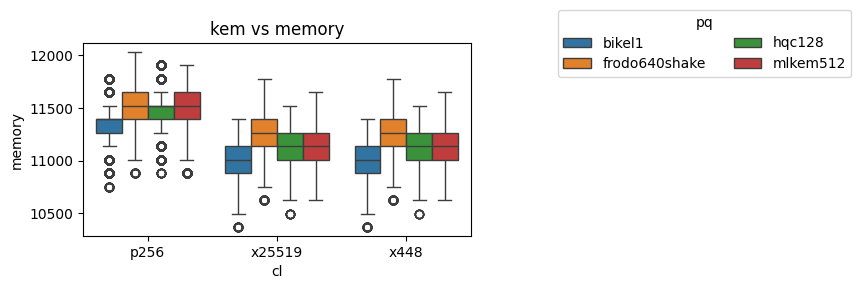

In [311]:
# memory-SIG
summary = df.groupby(['cl_sig','pq_sig']).agg(
    n=('memory','count'),
    median=('memory','median'),
    mean=('memory','mean'),
    std=('memory','std'),
    cv=('memory', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(5,2.5))
ax=sns.boxplot(data=df, x='cl_sig', y='memory', hue='pq_sig')
# plt.yscale('log')  # if skewed
plt.title("memory sig")
sns.move_legend(ax, "center right", bbox_to_anchor=(2, 1),ncol=2)
plt.show()

# memory-KEM
summary = df.groupby(['cl','pq']).agg(
    n=('memory','count'),
    median=('memory','median'),
    mean=('memory','mean'),
    std=('memory','std'),
    cv=('memory', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(5,2.5))
ax=sns.boxplot(data=df, x='cl', y='memory', hue='pq')
# plt.yscale('log')  # if skewed
plt.title("kem vs memory")
sns.move_legend(ax, "center right", bbox_to_anchor=(2, 1),ncol=2)
plt.show()

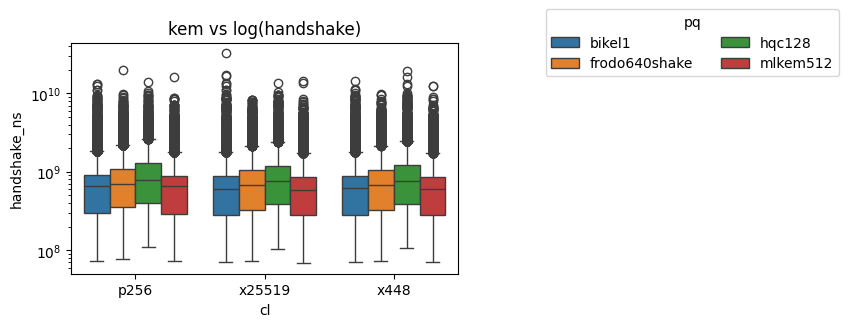

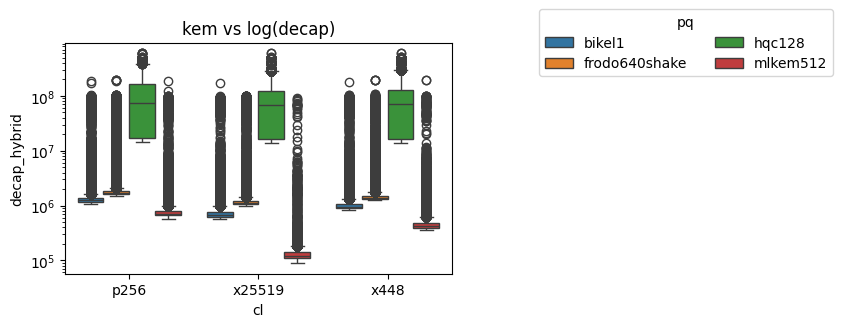

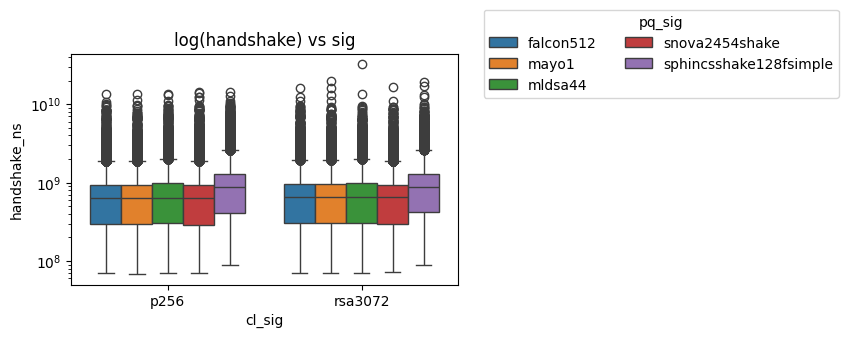

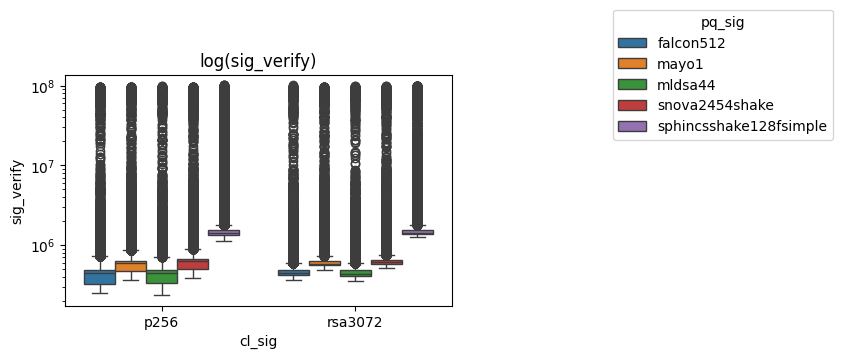

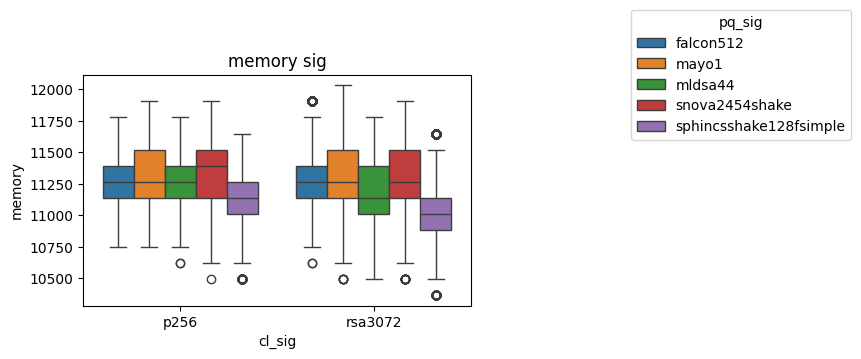

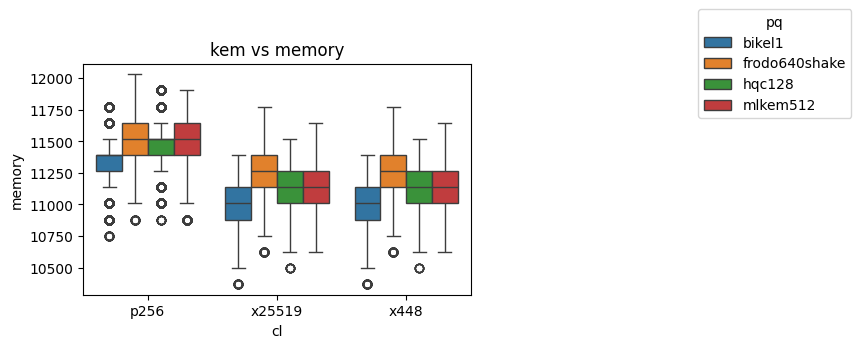

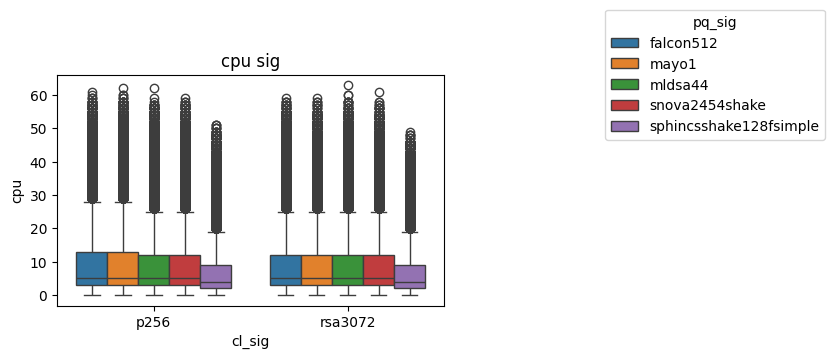

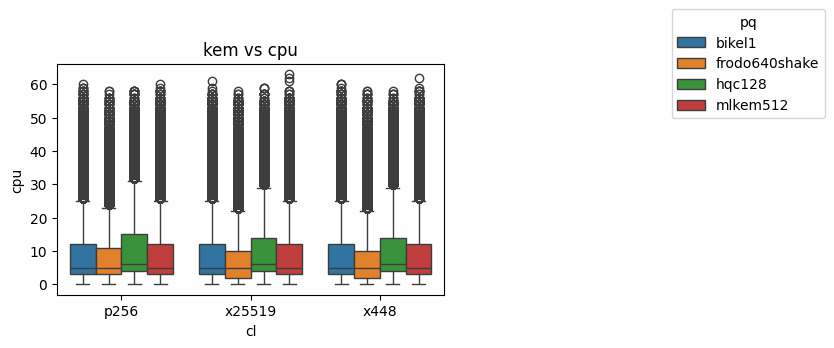

In [313]:
# log scale, write that not log(xx)

# KEM
summary = df.groupby(['cl','pq']).agg(
    n=('handshake_ns','count'),
    median=('handshake_ns','median'),
    mean=('handshake_ns','mean'),
    std=('handshake_ns','std'),
    cv=('handshake_ns', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(5,3))
ax=sns.boxplot(data=df, x='cl', y='handshake_ns', hue='pq')
plt.yscale('log')  # if skewed
plt.title("kem vs log(handshake)")
sns.move_legend(ax, "center right", bbox_to_anchor=(2, 1), ncol=2)
plt.show()

# Dec
summary = df.groupby(['cl','pq']).agg(
    n=('decap_hybrid','count'),
    median=('decap_hybrid','median'),
    mean=('decap_hybrid','mean'),
    std=('decap_hybrid','std'),
    cv=('decap_hybrid', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(5,3))
ax=sns.boxplot(data=df, x='cl', y='decap_hybrid', hue='pq')
plt.yscale('log')  # if skewed
plt.title("kem vs log(decap)")
sns.move_legend(ax, "center right", bbox_to_anchor=(2, 1), ncol=2)
plt.show()

# sig
summary = df.groupby(['cl_sig','pq_sig']).agg(
    n=('handshake_ns','count'),
    median=('handshake_ns','median'),
    mean=('handshake_ns','mean'),
    std=('handshake_ns','std'),
    cv=('handshake_ns', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(5,3))
ax=sns.boxplot(data=df, x='cl_sig', y='handshake_ns', hue='pq_sig')
plt.yscale('log')  # if skewed
plt.title("log(handshake) vs sig")
sns.move_legend(ax, "center right", bbox_to_anchor=(2, 1), ncol=2)
plt.show()

# verify
summary = df.groupby(['cl_sig','pq_sig']).agg(
    n=('sig_verify','count'),
    median=('sig_verify','median'),
    mean=('sig_verify','mean'),
    std=('sig_verify','std'),
    cv=('sig_verify', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(5,3))
ax=sns.boxplot(data=df, x='cl_sig', y='sig_verify', hue='pq_sig')
plt.yscale('log')  # if skewed
plt.title("log(sig_verify)")
sns.move_legend(ax, "center right", bbox_to_anchor=(2, 1))
plt.show()


# memory-SIG
summary = df.groupby(['cl_sig','pq_sig']).agg(
    n=('memory','count'),
    median=('memory','median'),
    mean=('memory','mean'),
    std=('memory','std'),
    cv=('memory', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(5,3))
ax=sns.boxplot(data=df, x='cl_sig', y='memory', hue='pq_sig')
# plt.yscale('log')  # if skewed
plt.title("memory sig")
sns.move_legend(ax, "center right", bbox_to_anchor=(2, 1))
plt.show()

# memory-KEM
summary = df.groupby(['cl','pq']).agg(
    n=('memory','count'),
    median=('memory','median'),
    mean=('memory','mean'),
    std=('memory','std'),
    cv=('memory', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(5,3))
ax=sns.boxplot(data=df, x='cl', y='memory', hue='pq')
# plt.yscale('log')  # if skewed
plt.title("kem vs memory")
sns.move_legend(ax, "center right", bbox_to_anchor=(2, 1))
plt.show()

# cpu-SIG
summary = df.groupby(['cl_sig','pq_sig']).agg(
    n=('cpu','count'),
    median=('cpu','median'),
    mean=('cpu','mean'),
    std=('cpu','std'),
    cv=('cpu', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(5,3))
ax=sns.boxplot(data=df, x='cl_sig', y='cpu', hue='pq_sig')
# plt.yscale('log')  # if skewed
plt.title("cpu sig")
sns.move_legend(ax, "center right", bbox_to_anchor=(2, 1))
plt.show()

# cpu-KEM
summary = df.groupby(['cl','pq']).agg(
    n=('cpu','count'),
    median=('cpu','median'),
    mean=('cpu','mean'),
    std=('cpu','std'),
    cv=('cpu', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(5,3))
ax=sns.boxplot(data=df, x='cl', y='cpu', hue='pq')
# plt.yscale('log')  # if skewed
plt.title("kem vs cpu")
sns.move_legend(ax, "center right", bbox_to_anchor=(2, 1))
plt.show()

kem vs memory:
- p256 uses more
- bike uses least
- frodo uses most

sig vs memory:
- similar

handshake vs kem:
- frodo and hqc longest
- decaf just shows more extreme version

handshake vs sig:
- classical has minimal affect
- sphincs longest
- verify just more extreme

In [314]:
df.memory.max()-df.memory.min()

np.int64(1664)

## Linear plots

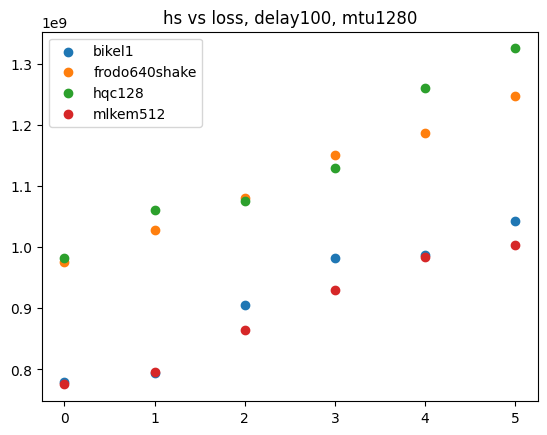

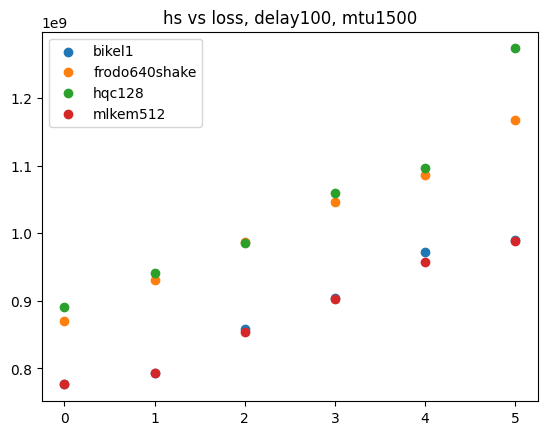

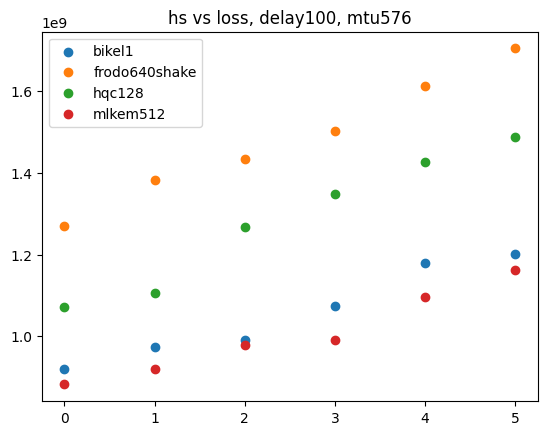

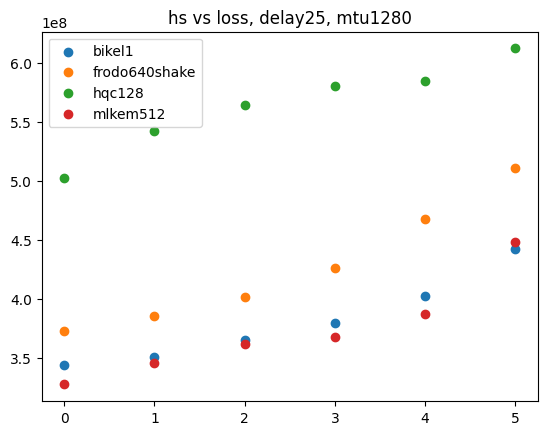

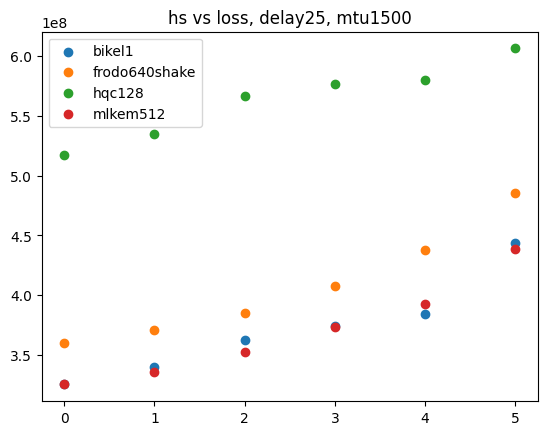

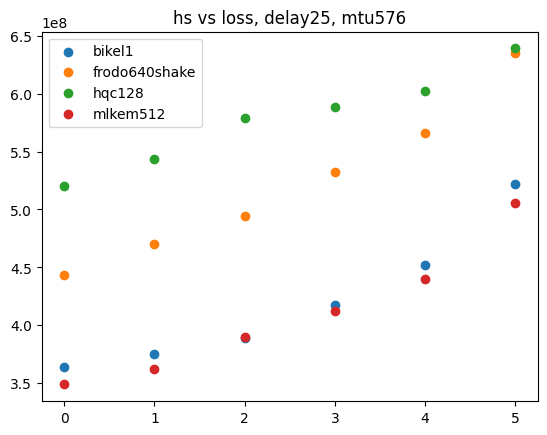

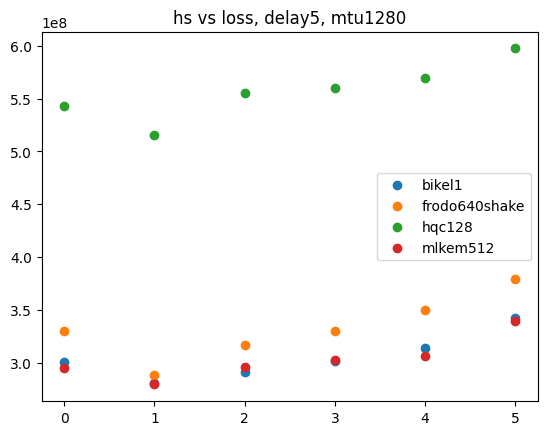

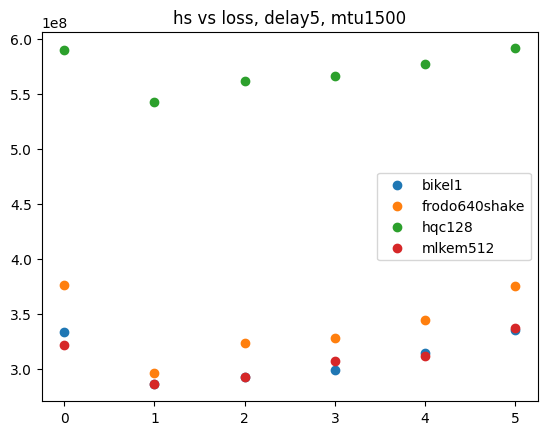

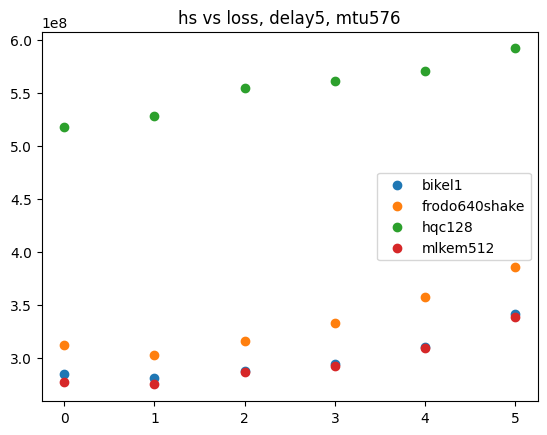

In [72]:
for i in df.delay.unique():
    for j in df.mtu.unique():
        tmp=df[(df.delay==i) & (df.mtu==j)]
        for k in df.pq.unique():
            tmp2=tmp[tmp.pq==k].groupby('loss').handshake_ns.median()
            plt.scatter(tmp2.index,tmp2,label=k)
        plt.legend()
        plt.title(f"hs vs loss, delay{i}, mtu{j}")
        plt.show()

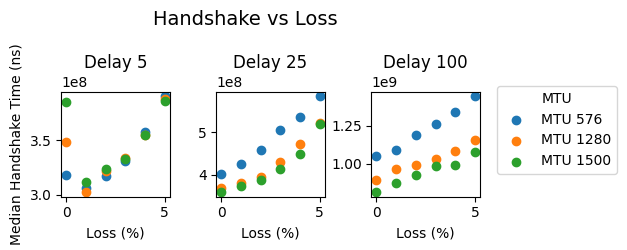

In [310]:
delays = sorted(df.delay.unique())   # 3 delays
mtus = sorted(df.mtu.unique())       # 3 MTUs

fig, axes = plt.subplots(1, len(delays), figsize=(5, 2.5))#, sharey=True)

for ax, delay in zip(axes, delays):
    subset = df[(df.delay == delay)]
    
    for mtu in mtus:
        tmp = subset[subset.mtu == mtu].groupby('loss').handshake_ns.median()
        ax.scatter(tmp.index, tmp, label=f"MTU {mtu}")
        # ax.set_yscale('log')
    
    ax.set_title(f"Delay {delay}")
    ax.set_xlabel("Loss (%)")

axes[0].set_ylabel("Median Handshake Time (ns)")
#axes[-1].legend(title="MTU")
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,labels,
    title="MTU", loc="center left", bbox_to_anchor=(.99, 0.5)
)
fig.suptitle(f"Handshake vs Loss", fontsize=14)
plt.tight_layout()
plt.show()

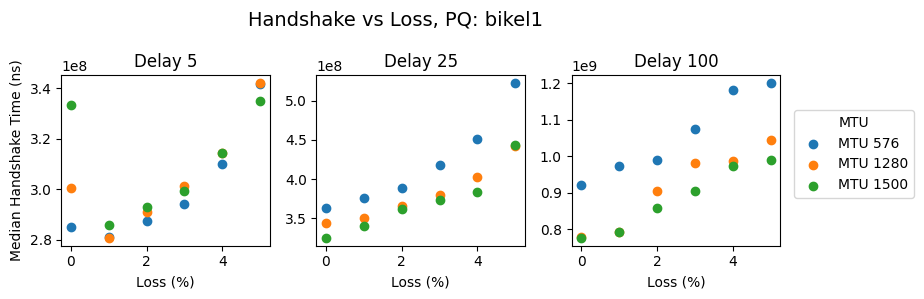

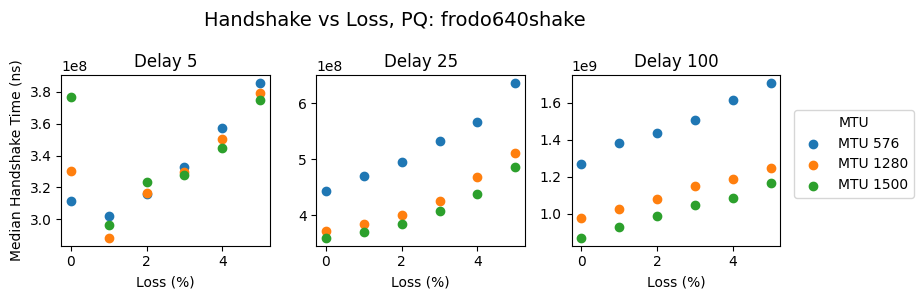

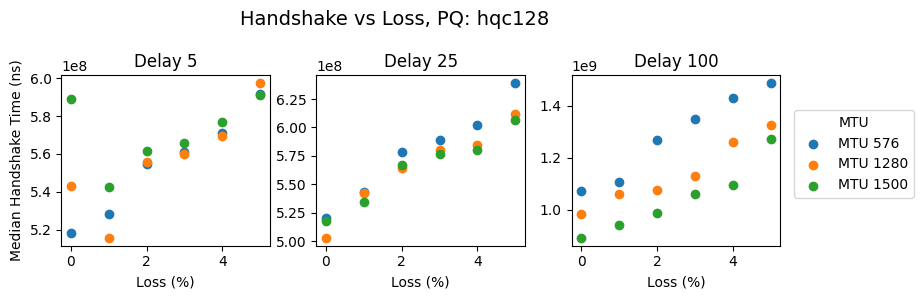

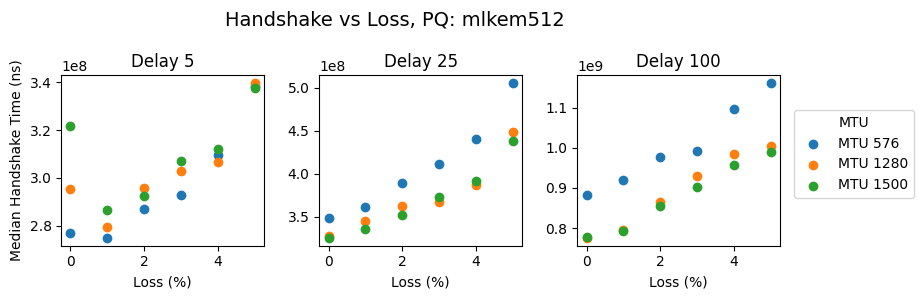

In [122]:
delays = sorted(df.delay.unique())   # 3 delays
mtus = sorted(df.mtu.unique())       # 3 MTUs
pqs = sorted(df.pq.unique())         # one figure per PQ algorithm

for pq_alg in pqs:
    fig, axes = plt.subplots(1, len(delays), figsize=(8, 3))#, sharey=True)
    
    for ax, delay in zip(axes, delays):
        subset = df[(df.pq == pq_alg) & (df.delay == delay)]
        
        for mtu in mtus:
            tmp = subset[subset.mtu == mtu].groupby('loss').handshake_ns.median()
            ax.scatter(tmp.index, tmp, label=f"MTU {mtu}")
        
        ax.set_title(f"Delay {delay}")
        ax.set_xlabel("Loss (%)")
    
    axes[0].set_ylabel("Median Handshake Time (ns)")
    #axes[-1].legend(title="MTU")
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles,labels,
        title="MTU", loc="center left", bbox_to_anchor=(.99, 0.5)
    )
    fig.suptitle(f"Handshake vs Loss, PQ: {pq_alg}", fontsize=14)
    plt.tight_layout()
    plt.show()

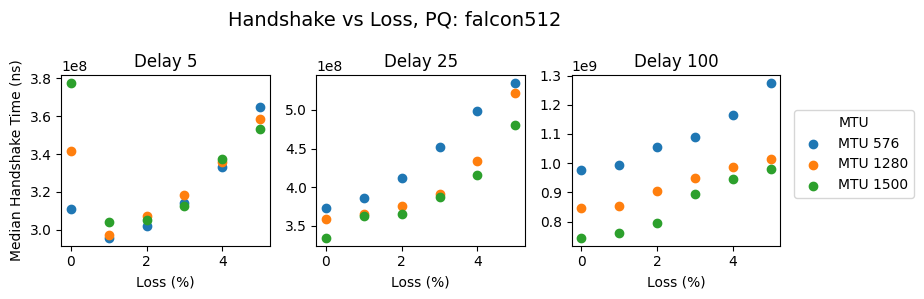

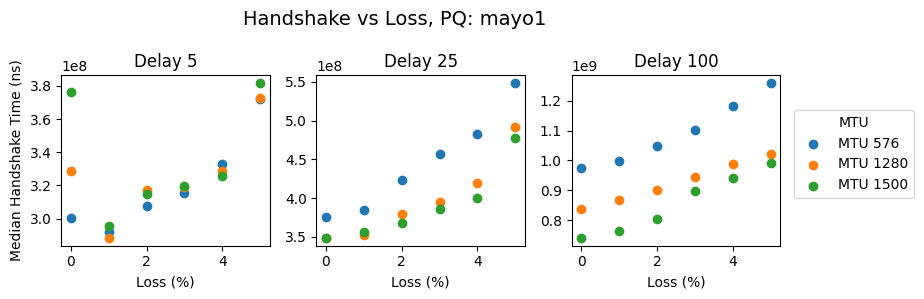

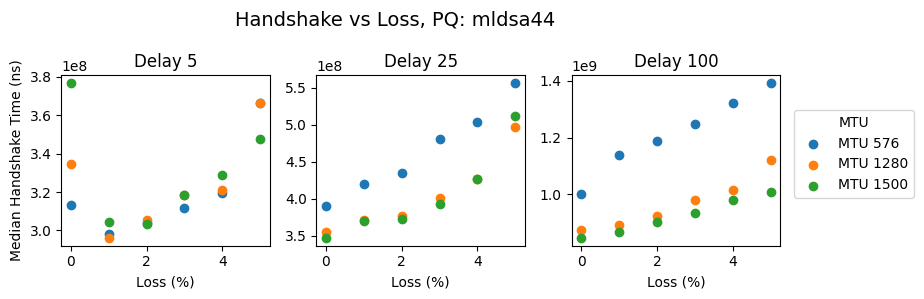

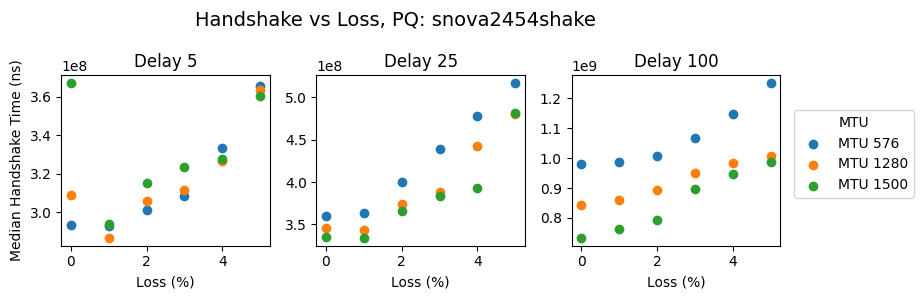

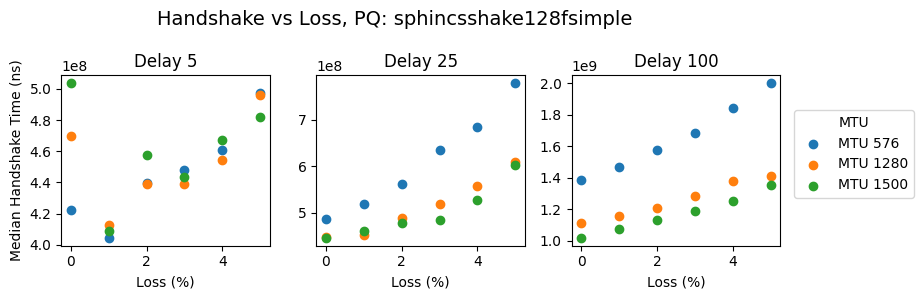

In [123]:
delays = sorted(df.delay.unique())   # 3 delays
mtus = sorted(df.mtu.unique())       # 3 MTUs
pqs = sorted(df.pq_sig.unique())         # one figure per PQ algorithm

for pq_alg in pqs:
    fig, axes = plt.subplots(1, len(delays), figsize=(8, 3))#, sharey=True)
    
    for ax, delay in zip(axes, delays):
        subset = df[(df.pq_sig == pq_alg) & (df.delay == delay)]
        
        for mtu in mtus:
            tmp = subset[subset.mtu == mtu].groupby('loss').handshake_ns.median()
            ax.scatter(tmp.index, tmp, label=f"MTU {mtu}")
        
        ax.set_title(f"Delay {delay}")
        ax.set_xlabel("Loss (%)")
    
    axes[0].set_ylabel("Median Handshake Time (ns)")
    #axes[-1].legend(title="MTU")
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles,labels,
        title="MTU", loc="center left", bbox_to_anchor=(.99, 0.5)
    )
    fig.suptitle(f"Handshake vs Loss, PQ: {pq_alg}", fontsize=14)
    plt.tight_layout()
    plt.show()

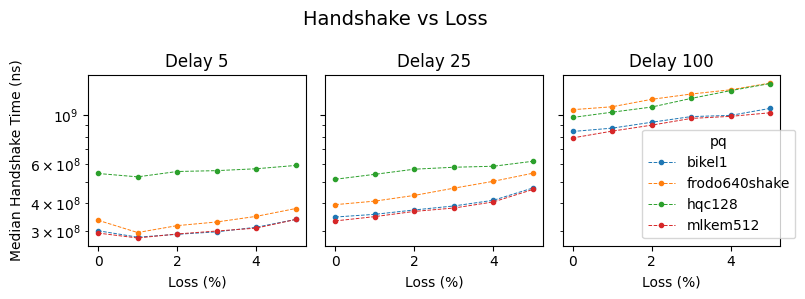

In [272]:
delays = sorted(df.delay.unique())   # 3 delays
pqs = df.pq.unique()         # one figure per PQ algorithm

fig, axes = plt.subplots(1, len(delays), figsize=(8, 3), sharey=True)

for ax, delay in zip(axes, delays):
    subset = df[(df.delay == delay)]
    
    for pq in pqs:
        tmp = subset[subset.pq == pq].groupby('loss').handshake_ns.median()
        ax.plot(tmp.index, tmp, marker='.', linestyle='dashed', linewidth=0.7,  label=f"{pq}")
        # ax.scatter(tmp.index, tmp, label=f"{pq}")
        ax.set_yscale('log')
    
    ax.set_title(f"Delay {delay}")
    ax.set_xlabel("Loss (%)")

axes[0].set_ylabel("Median Handshake Time (ns)")
#axes[-1].legend(title="MTU")
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,labels,
    title="pq", loc="center left", bbox_to_anchor=(.8, 0.4)
)
fig.suptitle(f"Handshake vs Loss", fontsize=14)
plt.tight_layout()
plt.show()

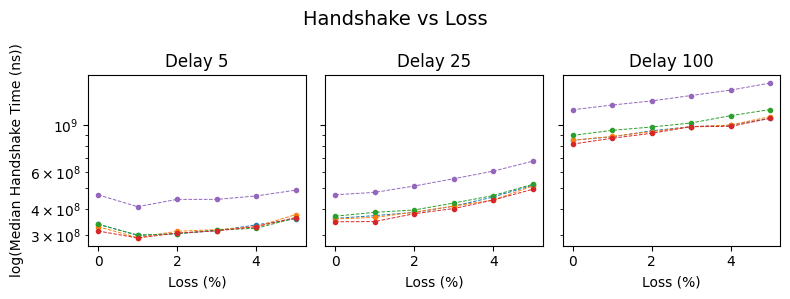

In [221]:
delays = sorted(df.delay.unique())   # 3 delays
pqs = df.pq_sig.unique()         # one figure per PQ algorithm

fig, axes = plt.subplots(1, len(delays), figsize=(8, 3), sharey=True)

for ax, delay in zip(axes, delays):
    subset = df[(df.delay == delay)]
    
    for pq in pqs:
        tmp = subset[subset.pq_sig == pq].groupby('loss').handshake_ns.median()
        ax.plot(tmp.index, tmp, marker='.', linestyle='dashed', linewidth=0.7,  label=f"{pq}")
        # ax.scatter(tmp.index, tmp, label=f"{pq}")
        ax.set_yscale('log')

    
    ax.set_title(f"Delay {delay}")
    ax.set_xlabel("Loss (%)")

axes[0].set_ylabel("log(Median Handshake Time (ns))")
#axes[-1].legend(title="MTU")
handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(
#     handles,labels,
#     title="pq sig", loc="center left", bbox_to_anchor=(.99, 0.5)
# )
fig.suptitle(f"Handshake vs Loss", fontsize=14)
plt.tight_layout()
plt.show()

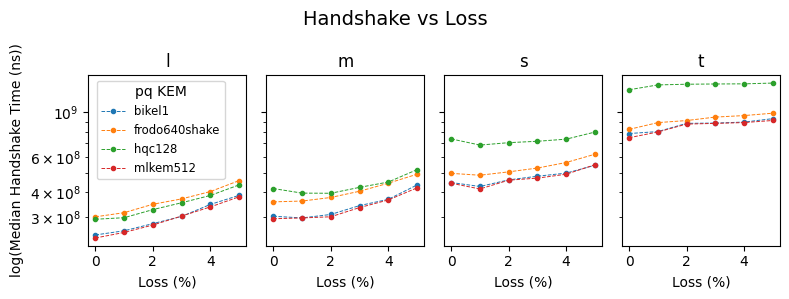

In [231]:
delays = (df.comp_size.unique())   # 3 delays
pqs = df.pq.unique()         # one figure per PQ algorithm

fig, axes = plt.subplots(1, len(delays), figsize=(8, 3), sharey=True)

for ax, delay in zip(axes, delays):
    subset = df[(df.comp_size == delay)]
    
    for pq in pqs:
        tmp = subset[subset.pq == pq].groupby('loss').handshake_ns.median()
        ax.plot(tmp.index, tmp, marker='.', linestyle='dashed', linewidth=0.7,  label=f"{pq}")
        ax.set_yscale('log')

    
    ax.set_title(f"{delay}")
    ax.set_xlabel("Loss (%)")

axes[0].set_ylabel("log(Median Handshake Time (ns))")
#axes[-1].legend(title="MTU")
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,labels,fontsize='small',
    title="pq KEM", loc="center left", bbox_to_anchor=(0.12, 0.58)
)
fig.suptitle(f"Handshake vs Loss", fontsize=14)
plt.tight_layout()
plt.show()

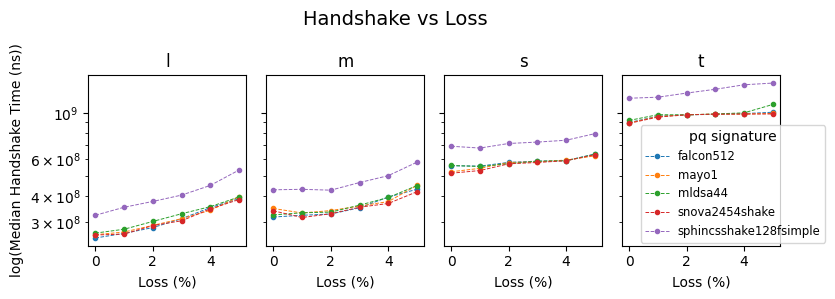

In [276]:
delays = df.comp_size.unique()   # 3 delays
pqs = df.pq_sig.unique()         # one figure per PQ algorithm

fig, axes = plt.subplots(1, len(delays), figsize=(8, 3), sharey=True)

for ax, delay in zip(axes, delays):
    subset = df[(df.comp_size == delay)]
    
    for pq in pqs:
        tmp = subset[subset.pq_sig == pq].groupby('loss').handshake_ns.median()
        ax.plot(tmp.index, tmp, marker='.', linestyle='dashed', linewidth=0.7,  label=f"{pq}")
        # ax.scatter(tmp.index, tmp, label=f"{pq}")
        ax.set_yscale('log')
    
    ax.set_title(f"{delay}")
    ax.set_xlabel("Loss (%)")

axes[0].set_ylabel("log(Median Handshake Time (ns))")
#axes[-1].legend(title="MTU")
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,labels,fontsize='small',
    title="pq signature", loc="center left", bbox_to_anchor=(.8, .4)
)
fig.suptitle(f"Handshake vs Loss", fontsize=14)
plt.tight_layout()
plt.show()

26825         p256_mayo1_x25519_mlkem512
172650    p256_falcon512_x25519_mlkem512
22700           p256_mayo1_x25519_bikel1
103675       rsa3072_mayo1_x25519_bikel1
28250             p256_mayo1_x448_bikel1
Name: combination, dtype: object

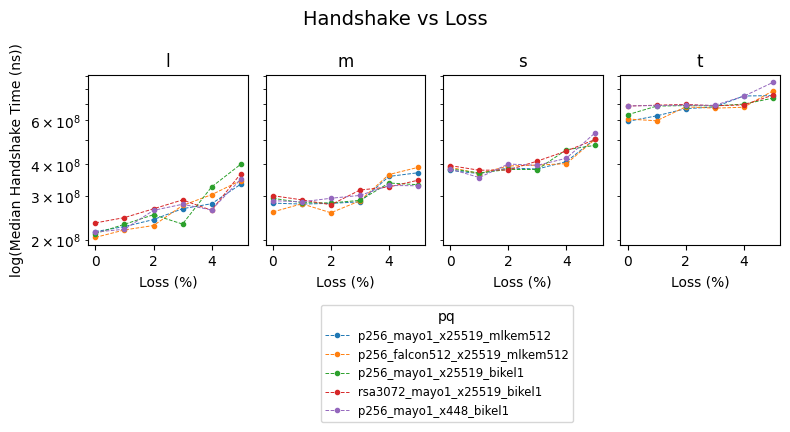

In [228]:
delays = df.comp_size.unique()   # 3 delays
pqs = df.sort_values('handshake_ns').combination.head()       # one figure per PQ algorithm

fig, axes = plt.subplots(1, len(delays), figsize=(8, 3), sharey=True)

for ax, delay in zip(axes, delays):
    subset = df[(df.comp_size == delay)]
    
    for pq in pqs:
        tmp = subset[subset.combination == pq].groupby('loss').handshake_ns.median()
        ax.plot(tmp.index, tmp, marker='.', linestyle='dashed', linewidth=0.7,  label=f"{pq}")
        # ax.scatter(tmp.index, tmp, label=f"{pq}")
        ax.set_yscale('log')
    
    ax.set_title(f"{delay}")
    ax.set_xlabel("Loss (%)")

axes[0].set_ylabel("log(Median Handshake Time (ns))")
#axes[-1].legend(title="MTU")
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,labels,fontsize='small',
    title="pq", loc="center left", bbox_to_anchor=(.4, -.2)
)
fig.suptitle(f"Handshake vs Loss", fontsize=14)
plt.tight_layout()
plt.show()

## heatmap

In [129]:
def heatmaps(df, agg, metric):
    data=pd.crosstab(index=df.cl, columns=df.pq, values=df[metric], aggfunc=agg).values
    plt.figure(figsize=(5,4))
    plt.imshow(data, cmap='Reds', aspect='auto')
    plt.yticks([0,1,2],df.cl.unique())
    plt.xticks([0,1,2,3],df.pq.unique())
    plt.colorbar()
    plt.title(f"{metric} heatmap")
    plt.show()

    data=pd.crosstab(index=df.cl_sig, columns=df.pq_sig, values=df[metric], aggfunc=agg).values
    plt.figure(figsize=(5,4))
    plt.imshow(data, cmap='Reds', aspect='auto')
    plt.yticks([0,1],df.cl_sig.unique())
    plt.xticks([0,1,2,3,4],df.pq_sig.unique(),rotation=10)
    plt.title(f"{metric} heatmap")
    plt.colorbar()
    plt.show()

### handshake

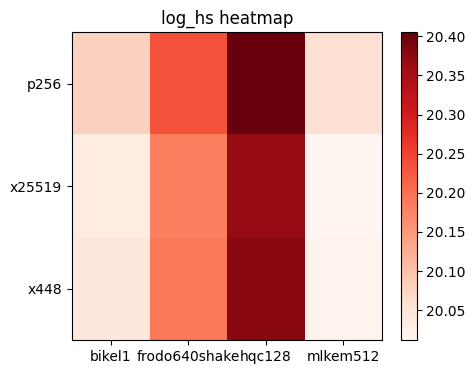

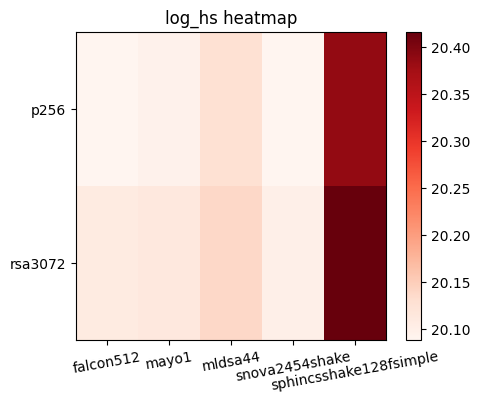

In [130]:
heatmaps(df, 'mean', 'log_hs')

see the same,SIG rsa, sphincs, KEM: p256, frodo hqc

### cpu util

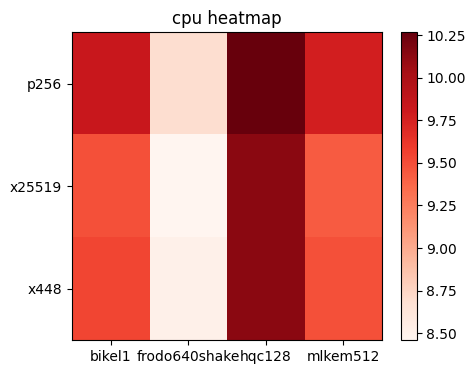

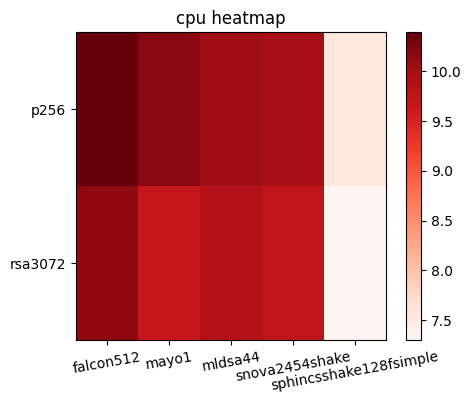

In [131]:
heatmaps(df, 'mean', 'cpu')

### memory

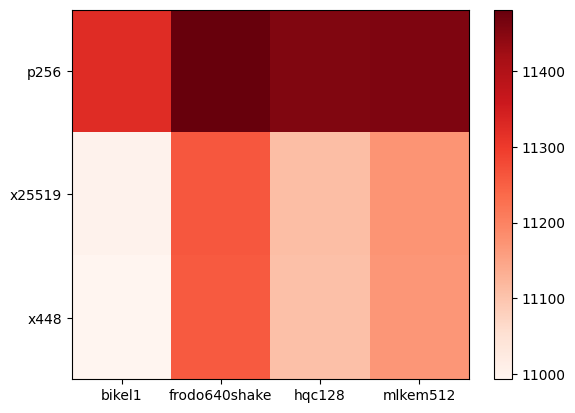

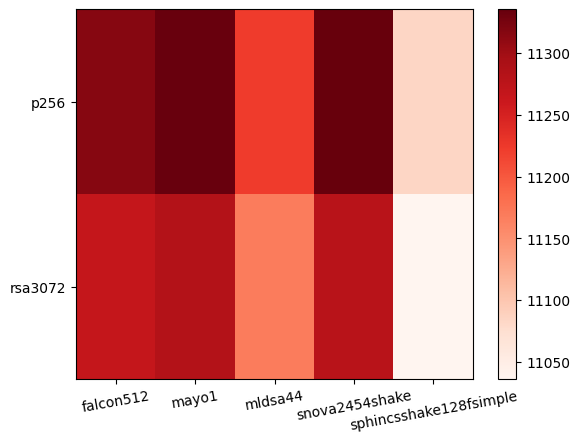

In [76]:
data=pd.crosstab(index=df.cl, columns=df.pq, values=df.memory, aggfunc='mean').values
plt.imshow(data, cmap='Reds', aspect='auto')
plt.yticks([0,1,2],df.cl.unique())
plt.xticks([0,1,2,3],df.pq.unique())
plt.colorbar()
plt.show()

data=pd.crosstab(index=df.cl_sig, columns=df.pq_sig, values=df.memory, aggfunc='mean').values
plt.imshow(data, cmap='Reds', aspect='auto')
plt.yticks([0,1],df.cl_sig.unique())
plt.xticks([0,1,2,3,4],df.pq_sig.unique(),rotation=10)
plt.colorbar()
plt.show()

# Statistical significance

## anova assumptions

In [77]:
def anova_ass(df,groupby,metric):
    groups = [g[metric].dropna().values for _, g in df.groupby(groupby)]
    for name, g in df.groupby(groupby):
            print(name, stats.shapiro(g[metric].dropna()))
    levene_stat, levene_p = stats.levene(*groups, center='median')
    print('Levene p-value:', levene_p)

In [133]:
print('====all====')
metric='handshake_ns'
group='pq'
anova_ass(df,group,metric)
for delay in df.delay.unique():
    tmp=df[df.delay==delay]
    print(f'===={delay}====')
    anova_ass(df,group,metric)

====all====


C:\Users\robso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 162000.
  res = hypotest_fun_out(*samples, **kwds)


bikel1 ShapiroResult(statistic=np.float64(0.98277554006459), pvalue=np.float64(3.2339500527581462e-77))
frodo640shake ShapiroResult(statistic=np.float64(0.9845529980041947), pvalue=np.float64(9.34846281186681e-75))
hqc128 ShapiroResult(statistic=np.float64(0.9713526702990892), pvalue=np.float64(2.981059333299848e-89))
mlkem512 ShapiroResult(statistic=np.float64(0.9816727360924541), pvalue=np.float64(1.2280737711886732e-78))
Levene p-value: 2.5505243124381773e-258
====100====


C:\Users\robso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 162000.
  res = hypotest_fun_out(*samples, **kwds)


bikel1 ShapiroResult(statistic=np.float64(0.98277554006459), pvalue=np.float64(3.2339500527581462e-77))
frodo640shake ShapiroResult(statistic=np.float64(0.9845529980041947), pvalue=np.float64(9.34846281186681e-75))
hqc128 ShapiroResult(statistic=np.float64(0.9713526702990892), pvalue=np.float64(2.981059333299848e-89))
mlkem512 ShapiroResult(statistic=np.float64(0.9816727360924541), pvalue=np.float64(1.2280737711886732e-78))
Levene p-value: 2.5505243124381773e-258
====25====


C:\Users\robso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 162000.
  res = hypotest_fun_out(*samples, **kwds)


bikel1 ShapiroResult(statistic=np.float64(0.98277554006459), pvalue=np.float64(3.2339500527581462e-77))
frodo640shake ShapiroResult(statistic=np.float64(0.9845529980041947), pvalue=np.float64(9.34846281186681e-75))
hqc128 ShapiroResult(statistic=np.float64(0.9713526702990892), pvalue=np.float64(2.981059333299848e-89))
mlkem512 ShapiroResult(statistic=np.float64(0.9816727360924541), pvalue=np.float64(1.2280737711886732e-78))
Levene p-value: 2.5505243124381773e-258
====5====
bikel1 ShapiroResult(statistic=np.float64(0.98277554006459), pvalue=np.float64(3.2339500527581462e-77))
frodo640shake ShapiroResult(statistic=np.float64(0.9845529980041947), pvalue=np.float64(9.34846281186681e-75))
hqc128 ShapiroResult(statistic=np.float64(0.9713526702990892), pvalue=np.float64(2.981059333299848e-89))
mlkem512 ShapiroResult(statistic=np.float64(0.9816727360924541), pvalue=np.float64(1.2280737711886732e-78))
Levene p-value: 2.5505243124381773e-258


C:\Users\robso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 162000.
  res = hypotest_fun_out(*samples, **kwds)


cannot use anova as assumptions violated

## kw, dunn

In [79]:
import itertools
import numpy as np
from scipy import stats
import scikit_posthocs as sp

def kw_dunn(df, metric, groupby):
    groups = [g[metric].dropna().values for _, g in df.groupby(groupby)]
    group_labels = list(df[groupby].unique())
    n_total = len(df)
    k = len(groups)

    # Kruskal–Wallis omnibus
    kw_stat, kw_p = stats.kruskal(*groups)
    print(f"Kruskal–Wallis p = {kw_p:.4f}")

    # Overall effect size
    eta_sq = (kw_stat - k + 1) / (n_total - k)
    print(f"Effect size (η²ₕ): {eta_sq:.3f}\n")
    '''
    0.01 = small
    0.06 = medium
    0.14 = large 
    '''
    # Dunn post-hoc (p-values only)
    dunn = sp.posthoc_dunn(df, val_col=metric, group_col=groupby, p_adjust='fdr_bh')
    print("=== Dunn pairwise p-values ===")
    print(dunn, "\n")

    # ---- Manual pairwise z & effect sizes ----
    ranked = df.copy()
    ranked["rank"] = stats.rankdata(ranked[metric])
    mean_ranks = ranked.groupby(groupby)["rank"].mean()
    ns = ranked.groupby(groupby).size()

    results = []
    for g1, g2 in itertools.combinations(group_labels, 2):
        R1, R2 = mean_ranks[g1], mean_ranks[g2]
        n1, n2 = ns[g1], ns[g2]
        se = np.sqrt((n_total * (n_total + 1)) / 12 * (1/n1 + 1/n2))
        z = (R1 - R2) / se
        r = abs(z) / np.sqrt(n_total)  # rank-biserial effect size
        p = dunn.loc[g1, g2] if g1 in dunn.index and g2 in dunn.columns else dunn.loc[g2, g1]
        results.append((g1, g2, z, p, r))

    print("=== Pairwise effect sizes (rank-biserial r) ===")
    '''
    0.1 = small
    0.3 = medium
    0.5 = large 
    '''
    print(f"{'Group 1':<12}{'Group 2':<12}{'Z':>8}{'p_adj':>10}{'r':>8}")
    for g1, g2, z, p, r in results:
        print(f"{g1:<12}{g2:<12}{z:>8.2f}{p:>10.4f}{r:>8.3f}")

    return {
        "kw_p": kw_p,
        "eta_sq": eta_sq,
        "pairwise": results,
        "dunn_p": dunn
    }


In [135]:
kw_dunn(df,"handshake_ns","pq")
for delay in df.delay.unique():
    tmp=df[df.delay==delay]
    print(f'===={delay}====')
    kw_dunn(tmp,"handshake_ns","pq")

Kruskal–Wallis p = 0.0000
Effect size (η²ₕ): 0.035

=== Dunn pairwise p-values ===
                     bikel1  frodo640shake  hqc128      mlkem512
bikel1         1.000000e+00            0.0     0.0  1.308961e-18
frodo640shake  0.000000e+00            1.0     0.0  0.000000e+00
hqc128         0.000000e+00            0.0     1.0  0.000000e+00
mlkem512       1.308961e-18            0.0     0.0  1.000000e+00 

=== Pairwise effect sizes (rank-biserial r) ===
Group 1     Group 2            Z     p_adj       r
bikel1      frodo640shake  -58.53    0.0000   0.073
bikel1      hqc128       -123.15    0.0000   0.153
bikel1      mlkem512        8.80    0.0000   0.011
frodo640shakehqc128        -64.62    0.0000   0.080
frodo640shakemlkem512       67.34    0.0000   0.084
hqc128      mlkem512      131.95    0.0000   0.164
====100====
Kruskal–Wallis p = 0.0000
Effect size (η²ₕ): 0.085

=== Dunn pairwise p-values ===
                     bikel1  frodo640shake        hqc128      mlkem512
bikel1         1

In [81]:
kw_dunn(df,"handshake_ns","pq_sig")
for delay in df.delay.unique():
    tmp=df[df.delay==delay]
    print(f'===={delay}====')
    kw_dunn(tmp,"handshake_ns","pq_sig")

Kruskal–Wallis p = 0.0000
Effect size (η²ₕ): 0.025

=== Dunn pairwise p-values ===
                           falcon512         mayo1       mldsa44  \
falcon512               1.000000e+00  4.126748e-01  7.254518e-36   
mayo1                   4.126748e-01  1.000000e+00  1.378061e-31   
mldsa44                 7.254518e-36  1.378061e-31  1.000000e+00   
snova2454shake          1.547018e-03  7.417037e-05  1.633178e-55   
sphincsshake128fsimple  0.000000e+00  0.000000e+00  0.000000e+00   

                        snova2454shake  sphincsshake128fsimple  
falcon512                 1.547018e-03                     0.0  
mayo1                     7.417037e-05                     0.0  
mldsa44                   1.633178e-55                     0.0  
snova2454shake            1.000000e+00                     0.0  
sphincsshake128fsimple    0.000000e+00                     1.0   

=== Pairwise effect sizes (rank-biserial r) ===
Group 1     Group 2            Z     p_adj       r
falcon512   mayo1

- all pq kems are statistically significant.
- not all sigs
- falcon and mayo become less significant as delay decreases
- at delay 5 nova is not sig diff except with sphincs

In [82]:
metric='handshake_ns'
group='cl'
kw_dunn(df,metric,group)
for delay in df.delay.unique():
    tmp=df[df.delay==delay]
    print(f'===={delay}====')
    kw_dunn(tmp,metric,group)

Kruskal–Wallis p = 0.0000
Effect size (η²ₕ): 0.001

=== Dunn pairwise p-values ===
                 p256         x25519          x448
p256     1.000000e+00  3.054087e-101  7.102903e-68
x25519  3.054087e-101   1.000000e+00  6.865553e-05
x448     7.102903e-68   6.865553e-05  1.000000e+00 

=== Pairwise effect sizes (rank-biserial r) ===
Group 1     Group 2            Z     p_adj       r
p256        x25519         21.41    0.0000   0.027
p256        x448           17.43    0.0000   0.022
x25519      x448           -3.98    0.0001   0.005
====100====
Kruskal–Wallis p = 0.0000
Effect size (η²ₕ): 0.000

=== Dunn pairwise p-values ===
                p256        x25519      x448
p256    1.000000e+00  6.067686e-12  0.000166
x25519  6.067686e-12  1.000000e+00  0.001542
x448    1.657396e-04  1.542289e-03  1.000000 

=== Pairwise effect sizes (rank-biserial r) ===
Group 1     Group 2            Z     p_adj       r
p256        x25519          7.03    0.0000   0.015
p256        x448            3.87

cl are sig diff

In [83]:
metric='handshake_ns'
group='cl_sig'
kw_dunn(df,metric,group)
for delay in df.delay.unique():
    tmp=df[df.delay==delay]
    print(f'===={delay}====')
    kw_dunn(tmp,metric,group)

Kruskal–Wallis p = 0.0000
Effect size (η²ₕ): 0.000

=== Dunn pairwise p-values ===
                 p256       rsa3072
p256     1.000000e+00  5.994326e-24
rsa3072  5.994326e-24  1.000000e+00 

=== Pairwise effect sizes (rank-biserial r) ===
Group 1     Group 2            Z     p_adj       r
p256        rsa3072       -10.09    0.0000   0.013
====100====
Kruskal–Wallis p = 0.0000
Effect size (η²ₕ): 0.000

=== Dunn pairwise p-values ===
                 p256       rsa3072
p256     1.000000e+00  6.731842e-17
rsa3072  6.731842e-17  1.000000e+00 

=== Pairwise effect sizes (rank-biserial r) ===
Group 1     Group 2            Z     p_adj       r
p256        rsa3072        -8.35    0.0000   0.018
====25====
Kruskal–Wallis p = 0.0000
Effect size (η²ₕ): 0.000

=== Dunn pairwise p-values ===
                 p256       rsa3072
p256     1.000000e+00  1.705124e-10
rsa3072  1.705124e-10  1.000000e+00 

=== Pairwise effect sizes (rank-biserial r) ===
Group 1     Group 2            Z     p_adj       r

all classical sig diff

# Top and bottom

In [ ]:
df['combination']=df.cl_sig+"_"+df.pq_sig+"_"+df.cl+"_"+df.pq

In [139]:
def head_tail(df,group,metric):
    x=df.groupby([group,'combination'])[metric].median().sort_values()
    for i in df[group].unique():
        print(f"\n======== {i} ========")
        y=x[x.index.get_level_values(group)==i]
        print('head')
        print(y.head())
        print('tail')
        print(y.tail())

In [140]:
head_tail(df,'delay','handshake_ns')


======== 100 ========
head
delay  combination                         
100    p256_snova2454shake_p256_mlkem512       777735821.0
       rsa3072_snova2454shake_p256_mlkem512    777774783.5
       rsa3072_snova2454shake_x448_mlkem512    779145866.0
       p256_mayo1_x25519_mlkem512              779149418.0
       p256_mayo1_x448_bikel1                  780264813.5
Name: handshake_ns, dtype: float64
tail
delay  combination                                      
100    p256_sphincsshake128fsimple_p256_frodo640shake       1.460428e+09
       rsa3072_sphincsshake128fsimple_x448_hqc128           1.460764e+09
       rsa3072_sphincsshake128fsimple_p256_hqc128           1.461477e+09
       rsa3072_sphincsshake128fsimple_p256_frodo640shake    1.473030e+09
       p256_sphincsshake128fsimple_p256_hqc128              1.477655e+09
Name: handshake_ns, dtype: float64

======== 25 ========
head
delay  combination                           
25     p256_snova2454shake_x25519_mlkem512       326141486.0
  

In [138]:
x=df.groupby(['comp_size','combination']).handshake_ns.median().sort_values()
for i in df.comp_size.unique():
    print(f"\n======== {i} ========")
    y=x[x.index.get_level_values('comp_size')==i]
    print(y.head())
    print(y.tail())


======== l ========
comp_size  combination                           
l          p256_snova2454shake_x25519_bikel1         235301095.0
           p256_falcon512_x448_mlkem512              239770638.0
           rsa3072_snova2454shake_x25519_mlkem512    239826888.0
           p256_falcon512_x25519_mlkem512            243904297.5
           rsa3072_falcon512_x448_mlkem512           245199075.0
Name: handshake_ns, dtype: float64
comp_size  combination                                      
l          p256_sphincsshake128fsimple_x25519_hqc128            411955830.5
           rsa3072_sphincsshake128fsimple_x448_frodo640shake    415107084.0
           p256_sphincsshake128fsimple_x25519_frodo640shake     417271674.0
           p256_sphincsshake128fsimple_p256_frodo640shake       418147188.5
           rsa3072_sphincsshake128fsimple_p256_frodo640shake    428789863.5
Name: handshake_ns, dtype: float64

======== m ========
comp_size  combination                      
m          p256_falcon512_x

In [85]:
df.groupby('combination').cpu.mean().sort_values()

combination
rsa3072_sphincsshake128fsimple_x25519_frodo640shake     6.603519
rsa3072_sphincsshake128fsimple_x448_frodo640shake       6.719630
p256_sphincsshake128fsimple_x448_frodo640shake          6.842222
rsa3072_sphincsshake128fsimple_x25519_mlkem512          6.911296
rsa3072_sphincsshake128fsimple_p256_frodo640shake       6.922778
                                                         ...    
p256_mayo1_p256_hqc128                                 10.815185
p256_falcon512_p256_mlkem512                           10.829074
p256_snova2454shake_p256_hqc128                        10.829630
rsa3072_falcon512_p256_hqc128                          10.887037
p256_falcon512_p256_hqc128                             10.953704
Name: cpu, Length: 120, dtype: float64

In [86]:
df.groupby('combination').memory.mean().sort_values()

combination
rsa3072_sphincsshake128fsimple_x448_bikel1      10826.927407
rsa3072_sphincsshake128fsimple_x25519_bikel1    10834.204444
rsa3072_sphincsshake128fsimple_x448_hqc128      10892.847407
rsa3072_sphincsshake128fsimple_x25519_hqc128    10901.641481
p256_sphincsshake128fsimple_x448_bikel1         10921.457778
                                                    ...     
rsa3072_mayo1_p256_frodo640shake                11576.225185
rsa3072_falcon512_p256_frodo640shake            11584.545185
p256_mayo1_p256_mlkem512                        11588.480000
rsa3072_snova2454shake_p256_mlkem512            11606.684444
rsa3072_mayo1_p256_mlkem512                     11624.201481
Name: memory, Length: 120, dtype: float64

correlation between time vs memory and cpu?

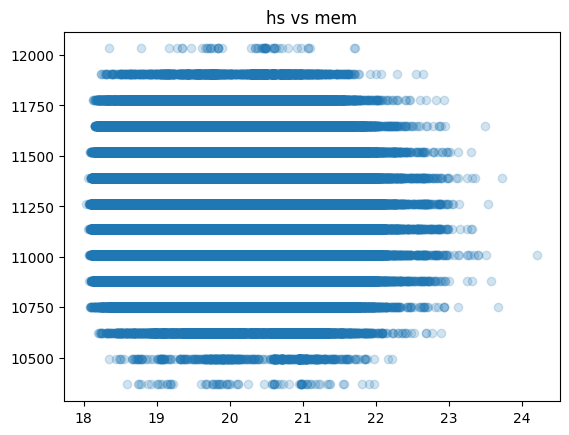

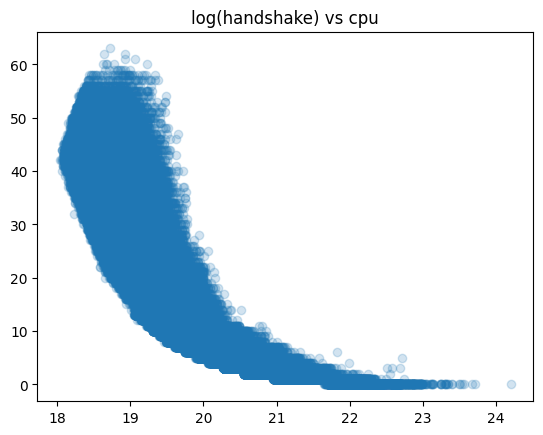

In [132]:
plt.scatter(np.log(df.handshake_ns),df.memory,alpha=0.2)
plt.title('hs vs mem')
plt.show()
plt.scatter(np.log(df.handshake_ns),df.cpu,alpha=0.2)
plt.title('log(handshake) vs cpu')
plt.show()


throughout matters more.

what about actual kem and sig memory req?
- openssl speed -signature-algorithms -elapsed -mlock
- openssl speed -kem-algorithms -elapsed -mlock
-seconds <sec>

# Linear model

                            OLS Regression Results                            
Dep. Variable:                 log_hs   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 3.906e+04
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:33:12   Log-Likelihood:            -5.6735e+05
No. Observations:              648000   AIC:                         1.135e+06
Df Residuals:                  647986   BIC:                         1.135e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

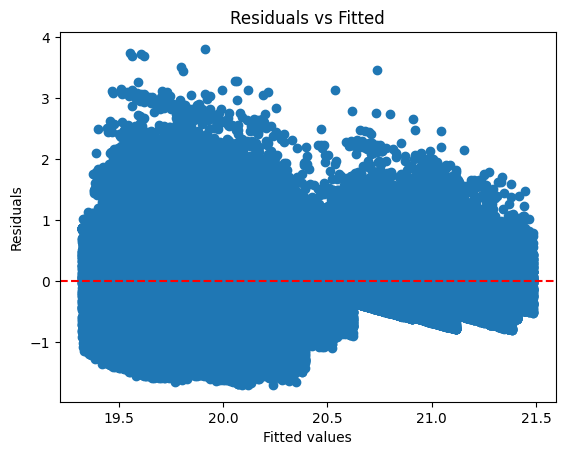

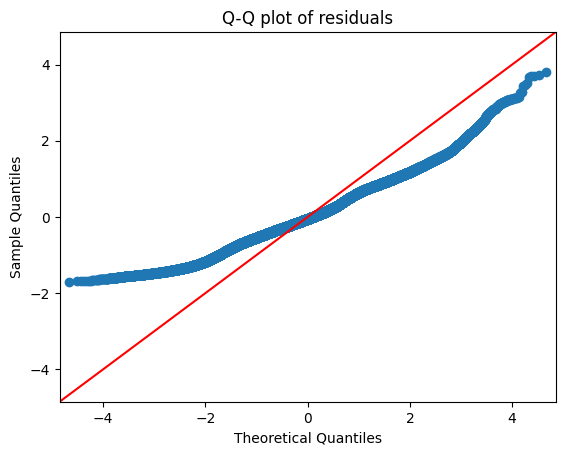

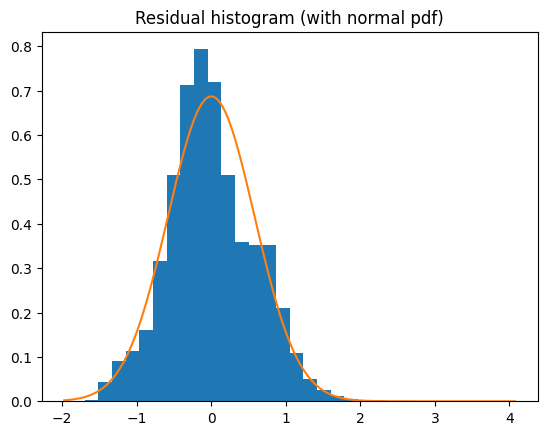

Shapiro-Wilk: stat=0.9928, p=4.598e-76


C:\Users\robso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 648000.
  res = hypotest_fun_out(*samples, **kwds)


In [88]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats  # for shapiro
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
df2=df#[df.delay<100].copy()

df2['log_hs']=np.log(df2.handshake_ns)
# df.log_hs=np.log(scale(df[['handshake_ns']]))

# 1) fit model
model = ols("log_hs ~ delay + loss + mtu + C(cl_sig) + C(pq_sig) + C(cl) + C(pq)", data=df2).fit()

# 2) residuals and fitted values
residuals = model.resid                # raw residuals
fitted = model.fittedvalues            # fitted (predicted) values
std_resid = model.get_influence().resid_studentized_internal  # standardized

# quick view
print(model.summary())                 # coefficients, R^2, etc.
print("Residuals head:\n", residuals.head())

# 3) Residuals vs Fitted plot
plt.figure()
plt.scatter(fitted, residuals)
plt.axhline(0, linestyle='--',c='r')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# 4) Q-Q plot (use statsmodels' qqplot)
sm.qqplot(residuals, line='45')   # line='45' draws y=x reference
plt.title("Q-Q plot of residuals")
plt.show()

# alternative Q-Q using scipy/probplot:
# stats.probplot(residuals, dist="norm", plot=plt)
# plt.show()

# 5) Histogram of residuals and KDE (quick)
plt.figure()
plt.hist(residuals, bins=30, density=True)
# overlay normal pdf for reference
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p = stats.norm.pdf(x, residuals.mean(), residuals.std())
plt.plot(x, p)
plt.title("Residual histogram (with normal pdf)")
plt.show()

# 6) Shapiro-Wilk test for normality of residuals
sh_stat, sh_p = stats.shapiro(residuals)
print("Shapiro-Wilk: stat=%.4f, p=%.4g" % (sh_stat, sh_p))

# # 7) Breusch-Pagan test for heteroskedasticity
# bp_test = het_breuschpagan(residuals, model.model.exog)
# bp_stat, bp_pvalue = bp_test[0], bp_test[1]
# print("Breusch-Pagan: Lagrange multiplier stat=%.4f, p=%.4g" % (bp_stat, bp_pvalue))

# # 8) Influence diagnostics: leverage, Cook's distance, standardized residuals
# infl = OLSInfluence(model)
# leverage = infl.hat_matrix_diag
# cooks = infl.cooks_distance[0]
# std_resid = infl.resid_studentized_internal

# # scatter Cook's vs leverage
# plt.figure()
# plt.scatter(leverage, std_resid)
# plt.xlabel("Leverage")
# plt.ylabel("Standardized residual")
# plt.title("Leverage vs Standardized residuals (influence plot)")
# plt.show()

# # show top influential points by Cook's distance
# top_idx = np.argsort(cooks)[-10:][::-1]
# print("Top 10 Cook's D indices and values:")
# for i in top_idx:
#     print(i, cooks[i])

# # optionally use influence_plot helper (adds labels)
# sm.graphics.influence_plot(model, criterion="cooks")
# plt.show()

# Best